# Exploratory Data Analysis (EDA) – Introduction

Before applying advanced analytics or modeling, it's crucial to first **explore the structure, quality, and key patterns** in the dataset. This phase—known as **Exploratory Data Analysis (EDA)**—helps us understand the nature of the data and uncover meaningful insights that guide further analysis.

The **Hybrid Manufacturing System (HMS)** dataset combines additive and subtractive manufacturing data, capturing information such as:

- Machine and operation types
- Material usage and energy consumption
- Processing times and job statuses
- Scheduled vs. actual start/end times
- Optimization categories

**During EDA, we:**
- Review data types, missing values, and distributions
- Analyze categorical variables (e.g., Machine_ID, Operation_Type)
- Visualize numeric features (e.g., Processing Time, Energy)
- Engineer new features like delays and durations
- Identify potential correlations and trends

This process provides a **foundational understanding** of the data and highlights patterns, anomalies, or relationships worth investigating through **hypothesis testing and modeling.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hybrid_manufacturing_categorical.csv")
df.head()

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,Completed,Moderate Efficiency
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00,Delayed,Low Efficiency
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaN,NaN,Failed,Low Efficiency
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00,Completed,Moderate Efficiency
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00,Completed,High Efficiency


In [3]:
df.columns

Index(['Job_ID', 'Machine_ID', 'Operation_Type', 'Material_Used',
       'Processing_Time', 'Energy_Consumption', 'Machine_Availability',
       'Scheduled_Start', 'Scheduled_End', 'Actual_Start', 'Actual_End',
       'Job_Status', 'Optimization_Category'],
      dtype='object')

### Initial Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_ID                 1000 non-null   object 
 1   Machine_ID             1000 non-null   object 
 2   Operation_Type         1000 non-null   object 
 3   Material_Used          1000 non-null   float64
 4   Processing_Time        1000 non-null   int64  
 5   Energy_Consumption     1000 non-null   float64
 6   Machine_Availability   1000 non-null   int64  
 7   Scheduled_Start        1000 non-null   object 
 8   Scheduled_End          1000 non-null   object 
 9   Actual_Start           871 non-null    object 
 10  Actual_End             871 non-null    object 
 11  Job_Status             1000 non-null   object 
 12  Optimization_Category  1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [11]:
# Shape of data
df.shape[0], df.shape[1]

(1000, 13)

In [12]:
# Summary statistics
df.describe(include='all')

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category
count,1000,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000,1000,871,871,1000,1000
unique,1000,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,J1000,M01,Lathe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Completed,Low Efficiency
freq,1,212,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673,650
mean,NaN,NaN,NaN,3.026480,71.38400,8.521340,89.163000,2023-03-21 19:15:00,2023-03-21 20:26:23.040000,2023-03-21 18:59:49.047072512,2023-03-21 20:11:07.990814976,NaN,NaN
min,NaN,NaN,NaN,1.010000,20.00000,2.010000,80.000000,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,NaN,NaN
25%,NaN,NaN,NaN,2.040000,48.00000,5.397500,84.000000,2023-03-20 01:37:30,2023-03-20 02:27:45,2023-03-20 01:41:30,2023-03-20 02:35:30,NaN,NaN
50%,NaN,NaN,NaN,3.080000,72.00000,8.560000,89.000000,2023-03-21 19:15:00,2023-03-21 20:18:00,2023-03-21 17:52:00,2023-03-21 19:04:00,NaN,NaN
75%,NaN,NaN,NaN,4.042500,96.00000,11.672500,94.000000,2023-03-23 12:52:30,2023-03-23 14:05:30,2023-03-23 12:54:30,2023-03-23 14:12:00,NaN,NaN
max,NaN,NaN,NaN,5.000000,120.00000,14.980000,99.000000,2023-03-25 06:30:00,2023-03-25 08:21:00,2023-03-25 06:29:00,2023-03-25 08:20:00,NaN,NaN


In [13]:
# Check for missing values
df.isnull().sum()

Job_ID                     0
Machine_ID                 0
Operation_Type             0
Material_Used              0
Processing_Time            0
Energy_Consumption         0
Machine_Availability       0
Scheduled_Start            0
Scheduled_End              0
Actual_Start             129
Actual_End               129
Job_Status                 0
Optimization_Category      0
dtype: int64

In [7]:
df.dtypes

Job_ID                    object
Machine_ID                object
Operation_Type            object
Material_Used            float64
Processing_Time            int64
Energy_Consumption       float64
Machine_Availability       int64
Scheduled_Start           object
Scheduled_End             object
Actual_Start              object
Actual_End                object
Job_Status                object
Optimization_Category     object
dtype: object

In [18]:
df['Machine_ID'].value_counts()

Machine_ID
M01    212
M02    210
M04    199
M05    193
M03    186
Name: count, dtype: int64

In [19]:
df['Operation_Type'].value_counts()

Operation_Type
Lathe       212
Grinding    208
Milling     201
Additive    190
Drilling    189
Name: count, dtype: int64

In [20]:
df['Job_Status'].value_counts()

Job_Status
Completed    673
Delayed      198
Failed       129
Name: count, dtype: int64

In [21]:
df['Optimization_Category'].value_counts()

Optimization_Category
Low Efficiency         650
Moderate Efficiency    183
High Efficiency        161
Optimal Efficiency       6
Name: count, dtype: int64

In [22]:
df['Material_Used'].value_counts()

Material_Used
4.02    8
2.77    7
3.36    7
1.73    7
3.22    7
       ..
3.98    1
1.88    1
4.23    1
1.89    1
1.31    1
Name: count, Length: 362, dtype: int64

# Data Preparation

### Change Data Types

In [8]:
# Convert relevant columns to datetime
datetime_cols = ['Scheduled_Start', 'Scheduled_End', 'Actual_Start', 'Actual_End']

for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Invalid values will be set as NaT

In [9]:
df.dtypes

Job_ID                           object
Machine_ID                       object
Operation_Type                   object
Material_Used                   float64
Processing_Time                   int64
Energy_Consumption              float64
Machine_Availability              int64
Scheduled_Start          datetime64[ns]
Scheduled_End            datetime64[ns]
Actual_Start             datetime64[ns]
Actual_End               datetime64[ns]
Job_Status                       object
Optimization_Category            object
dtype: object

In [10]:
df.head()

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,Completed,Moderate Efficiency
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00,Delayed,Low Efficiency
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaT,NaT,Failed,Low Efficiency
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00,Completed,Moderate Efficiency
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00,Completed,High Efficiency


## EDA

### Univariate Plots

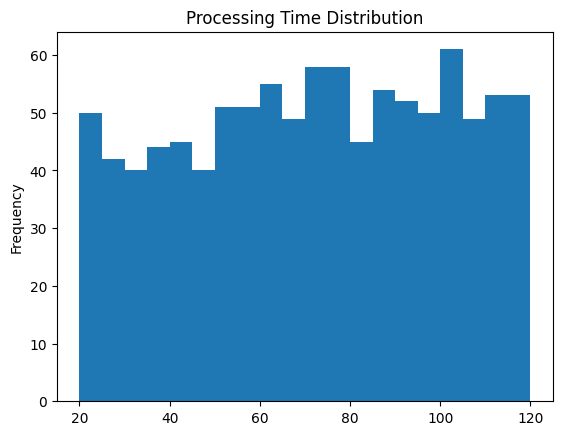

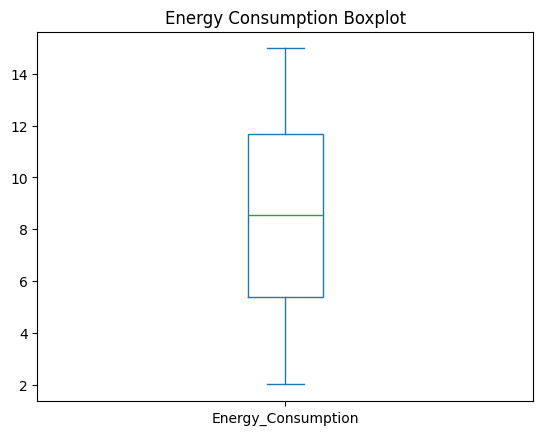

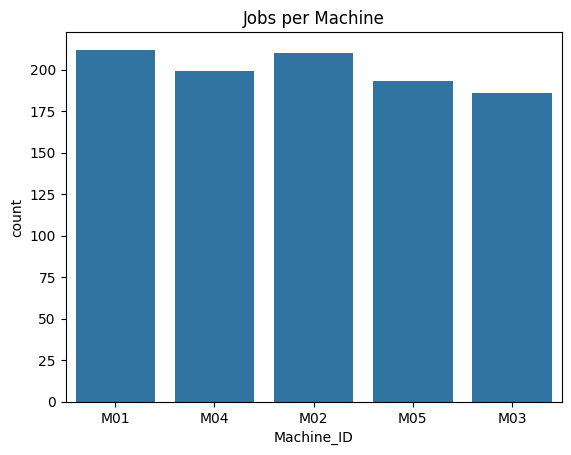

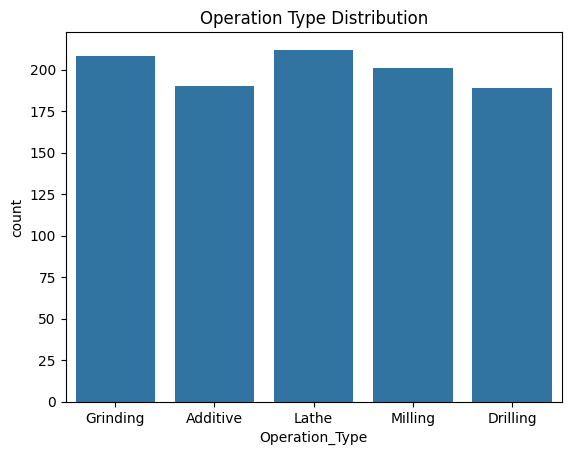

In [23]:
# Numeric distributions
df['Processing_Time'].plot(kind='hist', bins=20, title='Processing Time Distribution')
plt.show()

df['Energy_Consumption'].plot(kind='box', title='Energy Consumption Boxplot')
plt.show()

# Bar plot for categorical
sns.countplot(data=df, x='Machine_ID')
plt.title('Jobs per Machine')
plt.show()

sns.countplot(data=df, x='Operation_Type')
plt.title('Operation Type Distribution')
plt.show()

### Time Features

In [24]:
# Create delay & duration columns
df['Delay_Minutes'] = (df['Actual_End'] - df['Scheduled_End']).dt.total_seconds() / 60
df['Scheduled_Duration'] = (df['Scheduled_End'] - df['Scheduled_Start']).dt.total_seconds() / 60
df['Actual_Duration'] = (df['Actual_End'] - df['Actual_Start']).dt.total_seconds() / 60

### Correlation & Pairwise Analysis

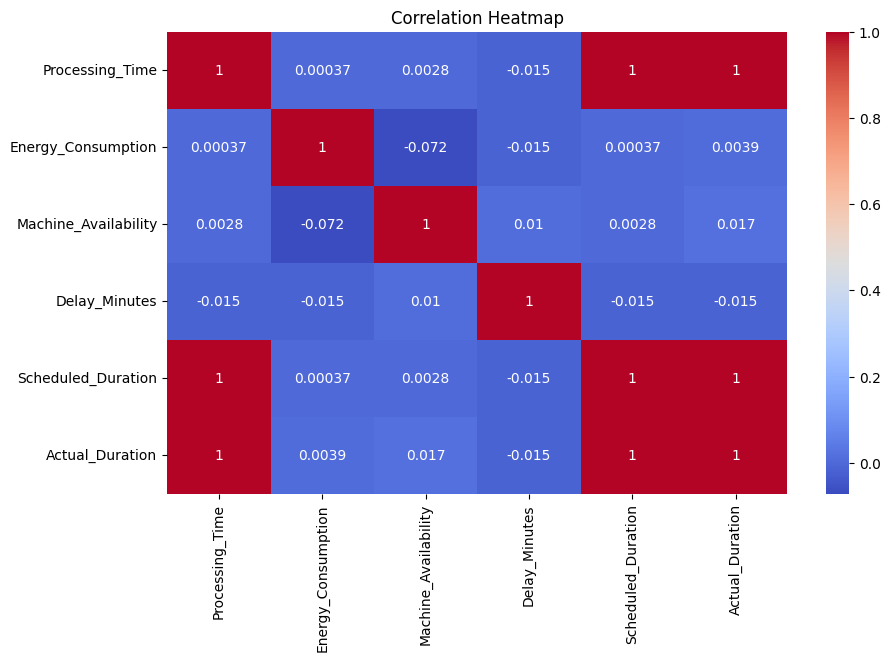

In [25]:
# Numeric correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Processing_Time', 'Energy_Consumption', 'Machine_Availability', 
                'Delay_Minutes', 'Scheduled_Duration', 'Actual_Duration']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Grouped Analysis

In [30]:
# Avg energy and time by optimization category
opt_stats = df.groupby('Optimization_Category')[['Processing_Time', 'Energy_Consumption', 'Delay_Minutes']].mean()

# Machine-level stats
machine_stats = df.groupby('Machine_ID')[['Processing_Time', 'Energy_Consumption', 'Delay_Minutes']].mean()

In [28]:
pd.DataFrame(opt_stats)

,Processing_Time,Energy_Consumption,Delay_Minutes
Optimization_Category,,,
High Efficiency,69.347826,5.586211,2.167702
Low Efficiency,72.640000,8.492292,5.819578
Moderate Efficiency,68.125683,11.405464,2.765027
Optimal Efficiency,89.333333,2.461667,0.666667


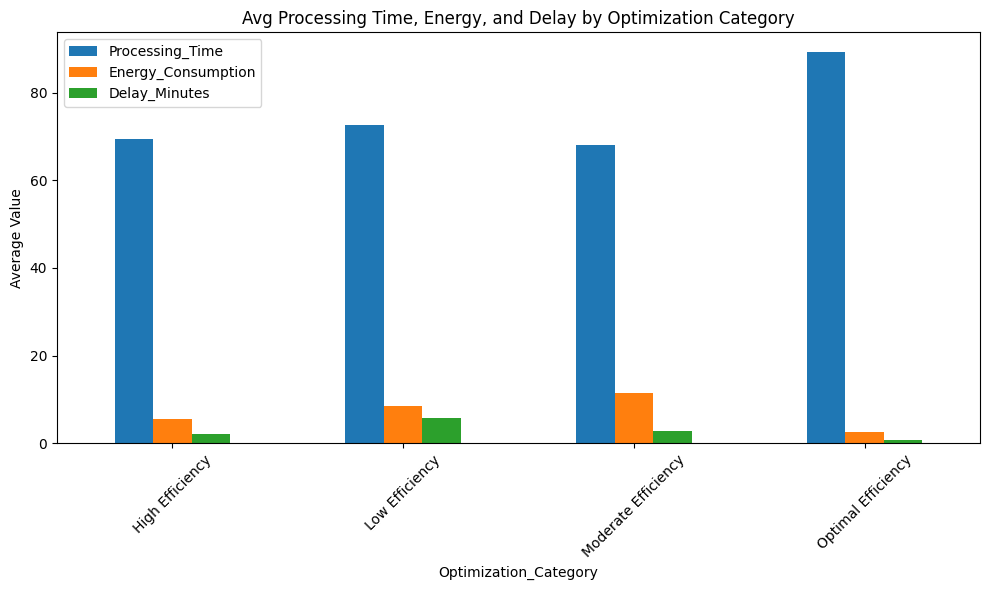

In [31]:
# Reset index so we can plot easily
opt_stats_plot = opt_stats.reset_index()

# Bar chart
opt_stats_plot.plot(
    x='Optimization_Category',
    kind='bar',
    figsize=(10, 6),
    title='Avg Processing Time, Energy, and Delay by Optimization Category'
)

plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
pd.DataFrame(machine_stats)

,Processing_Time,Energy_Consumption,Delay_Minutes
Machine_ID,,,
M01,70.457547,8.452547,3.867725
M02,74.023810,8.423429,4.195767
M03,69.913978,8.759892,4.337580
M04,71.603015,8.538492,4.676829
M05,70.720207,8.455855,5.343023


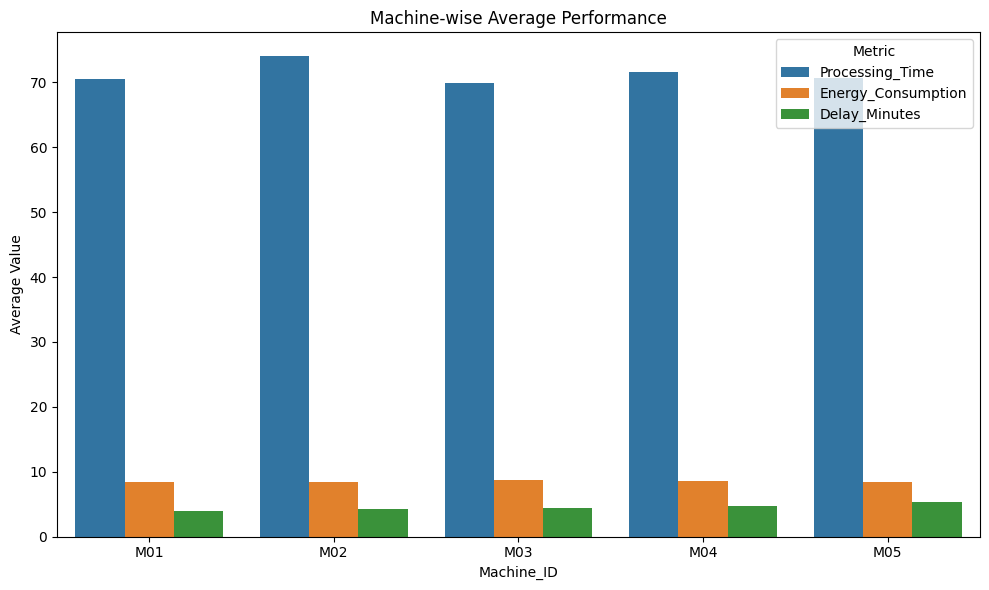

In [32]:
# Reset index for plotting
machine_stats_plot = machine_stats.reset_index()

# Bar chart with seaborn for better aesthetics
import seaborn as sns
plt.figure(figsize=(10, 6))

# Melt data for grouped bar plot
machine_melted = machine_stats_plot.melt(id_vars='Machine_ID',
                                         value_vars=['Processing_Time', 'Energy_Consumption', 'Delay_Minutes'],
                                         var_name='Metric', value_name='Value')

sns.barplot(data=machine_melted, x='Machine_ID', y='Value', hue='Metric')
plt.title('Machine-wise Average Performance')
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


In [33]:
df.head()

,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category,Delay_Minutes,Scheduled_Duration,Actual_Duration
0,J001,M01,Grinding,3.17,76,11.42,96,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00,Completed,Moderate Efficiency,5.0,76.0,76.0
1,J002,M01,Grinding,3.35,79,6.61,84,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00,Delayed,Low Efficiency,10.0,79.0,79.0
2,J003,M04,Additive,2.29,56,11.11,92,2023-03-18 08:20:00,2023-03-18 09:16:00,NaT,NaT,Failed,Low Efficiency,NaN,56.0,NaN
3,J004,M04,Grinding,1.76,106,12.50,95,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00,Completed,Moderate Efficiency,5.0,106.0,106.0
4,J005,M01,Lathe,1.90,46,8.13,88,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00,Completed,High Efficiency,2.0,46.0,46.0


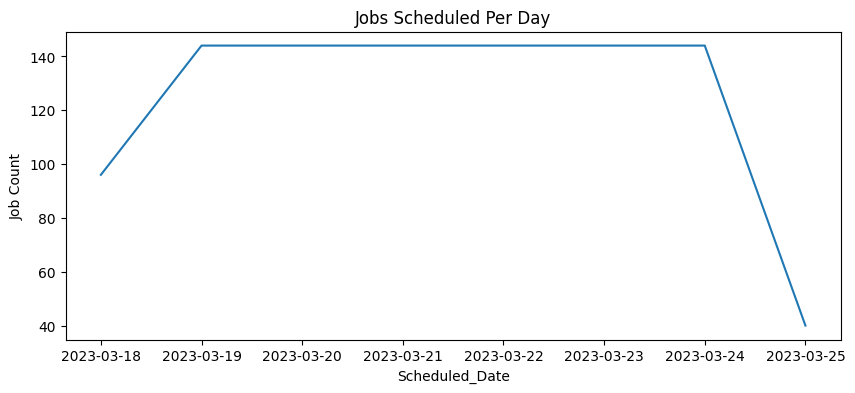

In [35]:
df['Scheduled_Date'] = df['Scheduled_Start'].dt.date
jobs_per_day = df.groupby('Scheduled_Date').size()

jobs_per_day.plot(kind='line', figsize=(10, 4), title='Jobs Scheduled Per Day')
plt.ylabel("Job Count")
plt.show()

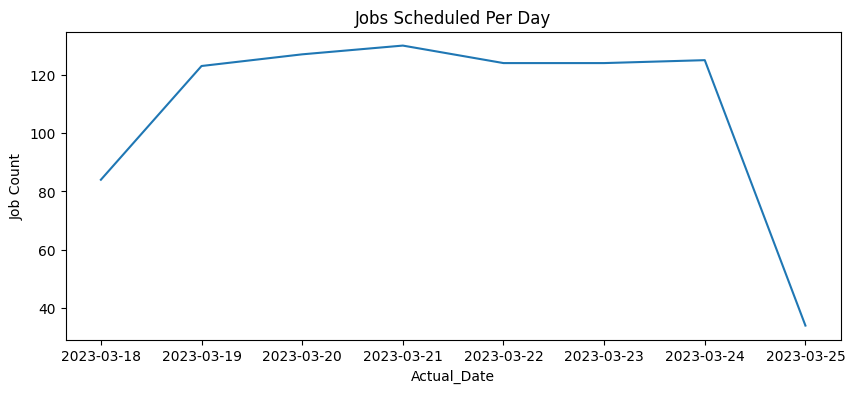

In [36]:
df['Actual_Date'] = df['Actual_Start'].dt.date
jobs_per_day = df.groupby('Actual_Date').size()

jobs_per_day.plot(kind='line', figsize=(10, 4), title='Jobs Scheduled Per Day')
plt.ylabel("Job Count")
plt.show()

In [37]:
df.to_csv("hybrid_system_cleaned.csv", index=False)